In [220]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [221]:
#Reading the csv data into a pandas dataframe
data = pd.read_csv("haberman.csv")
data.head()

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


## Objectieve:
    To classify the new data points as status based on Nodes, age and year.

## Oberservation from the data:
### Parameters-
    * Age: Represents the age of the patient when diagonised with disease.
    * Year: The year in which patient was diagonised.
    * Nodes: Number of nodes found which causes cancer.
    * Status: Its the label class, Status 1 represents that the patient survived for more than 5 years after the      
      operation.Status 2 states the patient died before 5 years.

In [222]:
#Description and Meta-data of the data
data.describe()

,age,year,nodes,status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


In [223]:
#Shape of the Data
print(data.shape)

(306, 4)


The above cell shows that there are 306 data points, 3 features and a target class.

In [224]:
#Column names of the Data
print(data.columns)

Index(['age', 'year', 'nodes', 'status'], dtype='object')


Here the 'age', 'year', 'nodes' are the features and 'status' is the label(target class)

In [225]:
#Counting the number of target classes
data["status"].value_counts()

1    225
2     81
Name: status, dtype: int64

   The given dataset has 225 points of the status 1 and 81 points of type 2

# 2D Scatter plot

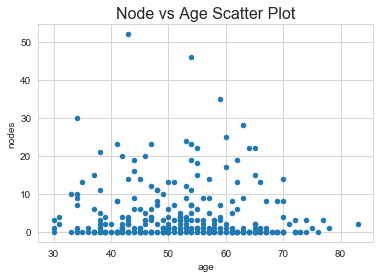

In [244]:
#2D scatter plot with age on x-axis and nodes on y-axis
data.plot(kind = 'scatter',x = 'age',y='nodes')
plt.title('Node vs Age Scatter Plot',fontsize=16)
plt.show()

# Pair-plots

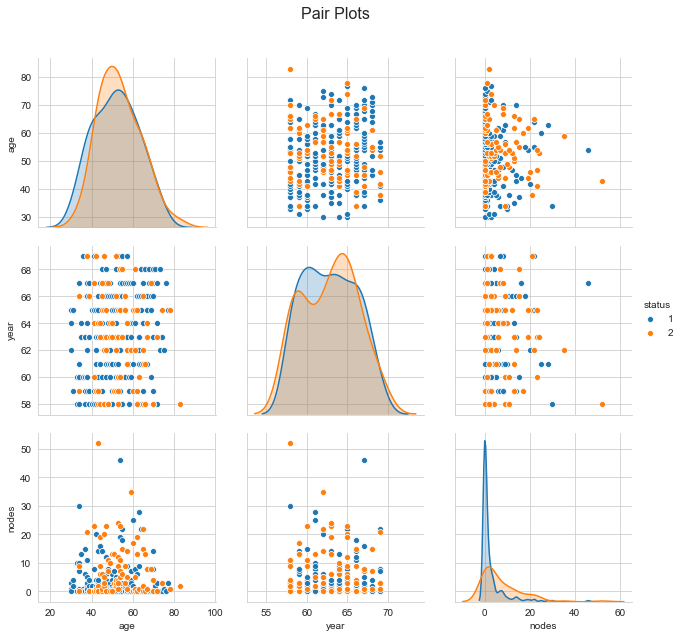

In [280]:
#Pair-plots
plt.close();
sns.set_style("whitegrid")
sns.pairplot(data, hue="status", height=3,vars=['age','year','nodes'])
plt.subplots_adjust(top=0.9)
plt.suptitle('Pair Plots',fontsize=16)
plt.show()

From the Node vs age pair-plot we observe that the status 2 is obsereved more in people of age 45-55. Whereas status 1 is widespread.Here status 1 states that the patient survivied and status 2 means patient died due to cancer.
Other than this pair-plot no other graph tends to follow patterns that helps in classification. 

# PDF's and CDF's

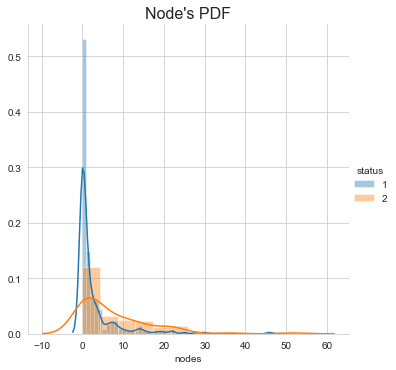

In [245]:
#Node's PDF
sns.FacetGrid(data,hue="status",height=5).map(sns.distplot,"nodes").add_legend()
plt.title("Node's PDF",fontsize=16)
plt.show()

From the probablity density function of the node we observe that status 1(Survival) is generally among the patients who had fewer nodes(lymphatic nodes).  

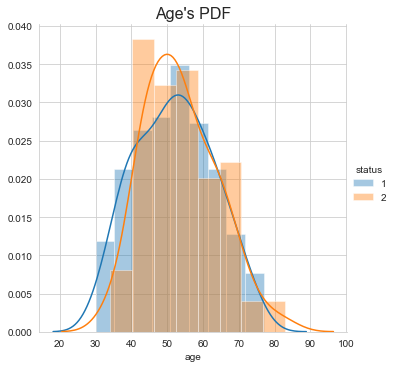

In [246]:
#PDF of age
sns.FacetGrid(data,hue="status",height=5).map(sns.distplot,"age").add_legend()
plt.title("Age's PDF",fontsize=16)
plt.show()

The probablity density function of the status does not visualize anything alone which can be considered for classification.   

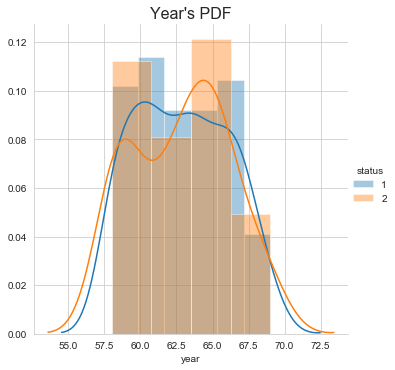

In [247]:
sns.FacetGrid(data,hue="status",height=5).map(sns.distplot,"year").add_legend()
plt.title("Year's PDF",fontsize=16)

plt.show()

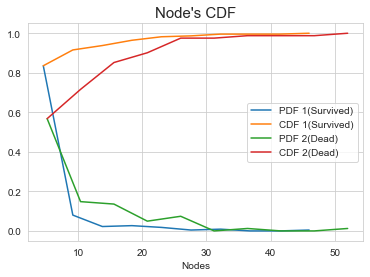

In [251]:
#Cumulative distribution function 

status1 = data.loc[data["status"] == 1]
status2 = data.loc[data["status"] == 2]

counts,bin_edges = np.histogram(status1['nodes'],bins=10,density=True)

pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label='PDF 1(Survived)');
plt.plot(bin_edges[1:], cdf,label='CDF 1(Survived)')


counts,bin_edges = np.histogram(status2['nodes'],bins=10,density=True)

pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label='PDF 2(Dead)');
plt.plot(bin_edges[1:], cdf,label='CDF 2(Dead)')
plt.legend()
plt.xlabel('Nodes')
plt.title("Node's CDF",fontsize=15)
plt.show()

The follwing points can inferenced from the cdf:
* All the patients who survived had less than 45 nodes.
* Patients who had nodes greater than 45 nodes didn't survive.
* On observing the CDF 1 we can state that almost ~98% of patients who survived had lass than 20 nodes.
* Among the people who died, only 70% of them had nodes less than 10

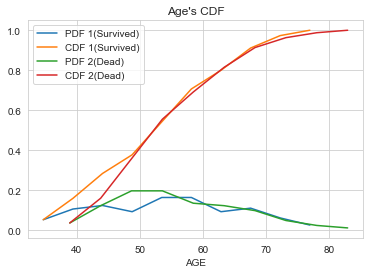

In [250]:
counts,bin_edges = np.histogram(status1['age'],bins=10,density=True)

pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label='PDF 1(Survived)');
plt.plot(bin_edges[1:], cdf,label='CDF 1(Survived)')


counts,bin_edges = np.histogram(status2['age'],bins=10,density=True)

pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label='PDF 2(Dead)');
plt.plot(bin_edges[1:], cdf,label='CDF 2(Dead)')
plt.legend()
plt.xlabel('AGE')
plt.title("Age's CDF",fontsize=15)
plt.show()

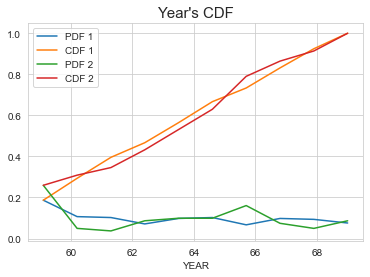

In [253]:
counts,bin_edges = np.histogram(status1['year'],bins=10,density=True)

pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label='PDF 1');
plt.plot(bin_edges[1:], cdf,label='CDF 1')


counts,bin_edges = np.histogram(status2['year'],bins=10,density=True)

pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label='PDF 2');
plt.plot(bin_edges[1:], cdf,label='CDF 2')
plt.legend()
plt.title("Year's CDF",fontsize=15)
plt.xlabel('YEAR')
plt.show()

The cumulative distribution function of the age and year doesn't show any patterns refering to cdf.

# BOX plots

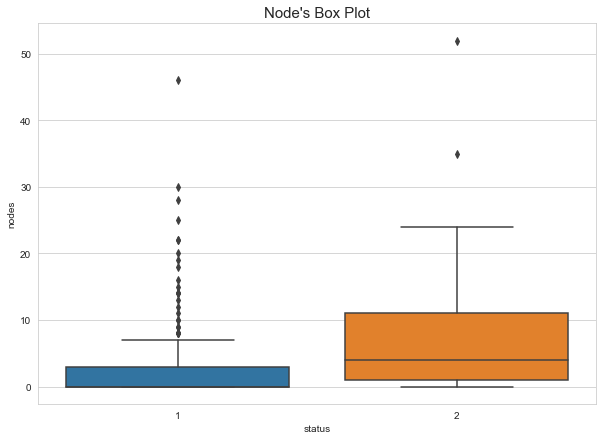

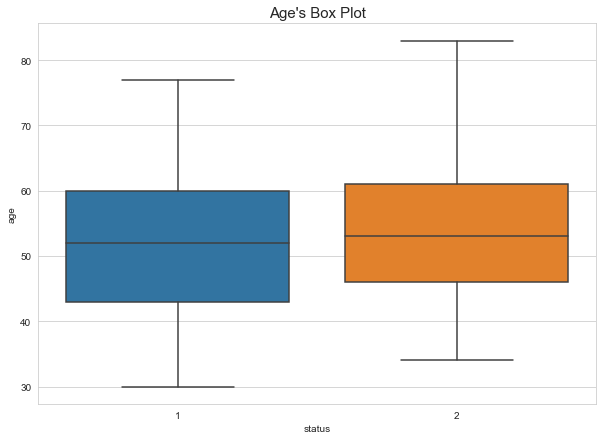

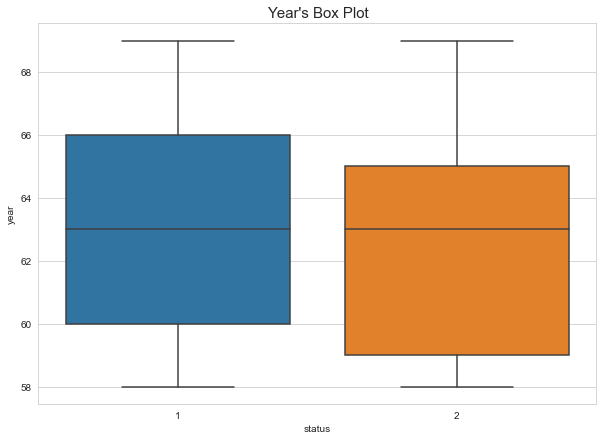

In [255]:
plt.close()
plt.figure(figsize=(10,7))
sns.boxplot(x='status',y='nodes',data=data)
plt.title("Node's Box Plot",fontsize=15)
plt.show()

plt.figure(figsize=(10,7))
plt.title("Age's Box Plot",fontsize=15)
sns.boxplot(x='status',y='age',data=data)
plt.show()

plt.figure(figsize=(10,7))
plt.title("Year's Box Plot",fontsize=15)
sns.boxplot(x='status',y='year',data=data)
plt.show()


From the Box-plot of the nodes we can observe that patients with more nodes died(Status 2). 

# Violin Plot

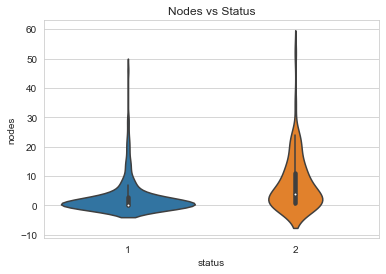

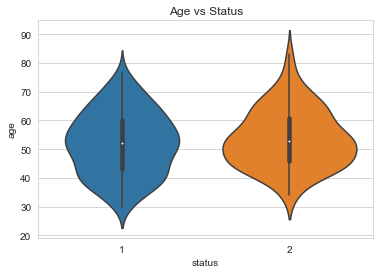

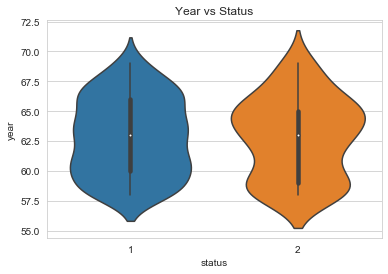

In [173]:
plot = sns.violinplot(x='status',y='nodes',data = data,size=10)
plot.title.set_text('Nodes vs Status')
plt.show()

plot = sns.violinplot(x='status',y='age',data = data,size=10)
plot.title.set_text('Age vs Status')
plt.show()

plot = sns.violinplot(x='status',y='year',data = data,size=10)
plot.title.set_text('Year vs Status')
plt.show()



We observe from the violin plot of the node that the centre of the people who observed is close to 0 and that of people who didn't survive has thier centre away from 0.

# Multivariant probablity density function

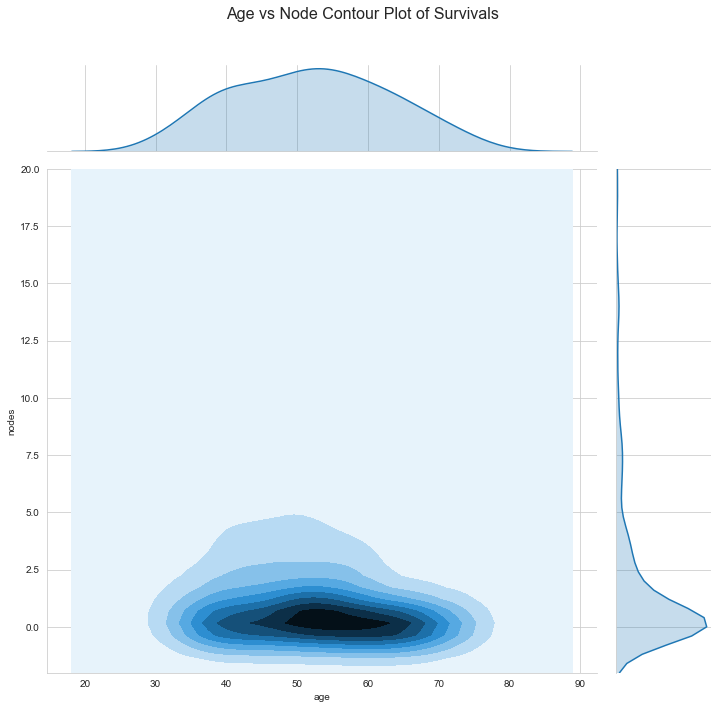

In [267]:
plot = sns.jointplot(x='age',y='nodes',data=status1,kind='kde',height=10)
plt.subplots_adjust(top=0.9)
plot.fig.suptitle('Age vs Node Contour Plot of Survivals',fontsize=16)
plot.ax_marg_y.set_ylim(-2, 20)
plt.show()

From the density function of Age vs Node for people who survived(Status 1), most of them were of aged between 50 to 60 and had nodes less than or 1. 

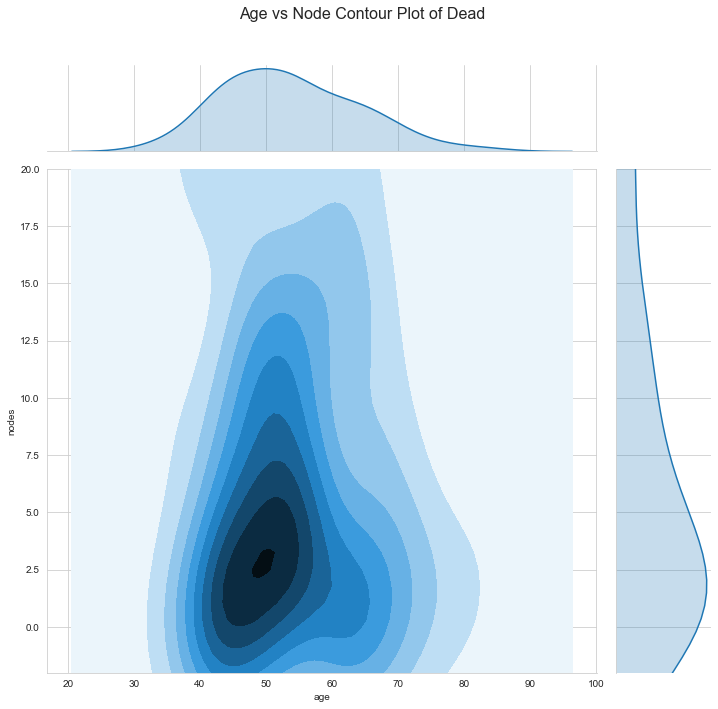

In [268]:
plot = sns.jointplot(x='age',y='nodes',data=status2,kind='kde',height=10)
plot.ax_marg_y.set_ylim(-2, 20)
plt.subplots_adjust(top=0.9)
plot.fig.suptitle('Age vs Node Contour Plot of Dead',fontsize=16)
plt.show()

From the density function we can observed that the people who died had nodes more than 2 and where mostly in late 40's.

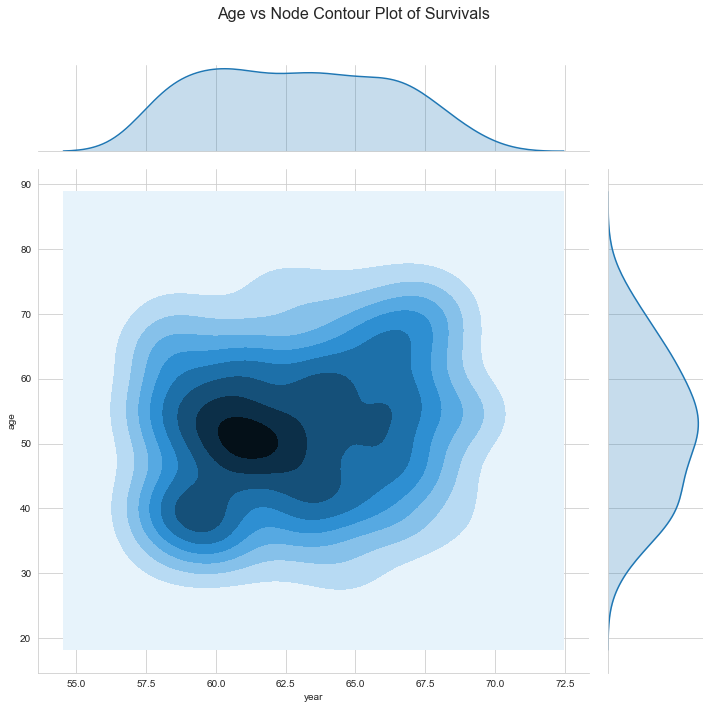

In [272]:
plot = sns.jointplot(x='year',y='age',data=status1,kind='kde',height=10)
plt.subplots_adjust(top=0.9)
plot.fig.suptitle('Age vs Node Contour Plot of Survivals',fontsize=16)
plt.show()

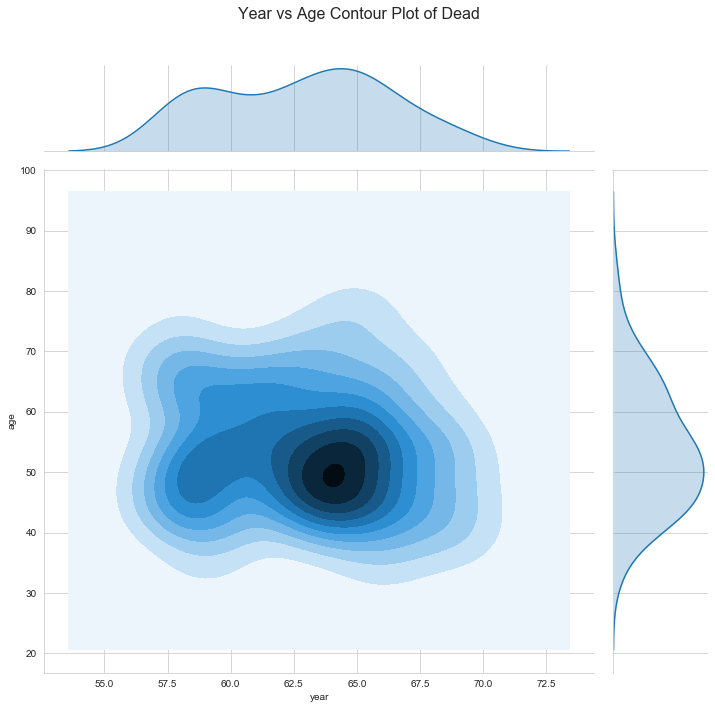

In [269]:
plot = sns.jointplot(x='year',y='age',data=status2,kind='kde',height=10)
plt.subplots_adjust(top=0.9)
plot.fig.suptitle('Year vs Age Contour Plot of Dead',fontsize=16)
plt.show()

On comparing the Multivariant Probablity Density Graphs of Status 1(Survived) and Status 2(Dead) plotted between age and year, the people who survived were aged between 45 to 55 and got operated 60 to 62.5.
Whereas the patients who din't survive got operated between 62.5 to 65.

## Oberservations from the data.
* No direct inferences can be drawn from the scatter plots drawn between any of the parameters.
* The pair-plot between node and age shows that the patients who survived had less number of nodes compare to patients who 
  died.
* Univariant analysis cannot be considered for classsification, as all the patterns are similar.
* The multivariant probability density funciton between age and nodes:
    * From the density function of Age vs Node for people who survived(Status 1), most of them were of aged between 50 to 60 
      and had nodes less than or 1
    * From the density function we can observed that the people who died had nodes more than 2 and where mostly in late 
      40's.
* On comparing the Multivariant Probablity Density Graphs of Status 1(Survived) and Status 2(Dead) plotted between age and    
  year, the people who survived were aged between 45 to 55 and got operated 60 to 62.5. Whereas the patients who din't 
  survive got operated between 62.5 to 65.
* Node plays a major role in classifiaction along with age and year. Age and Year directly does not deduce the status. 